<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_one_revisited/blob/main/New_Graph_Showing_Correction/Frannk_Ackley_gen_2000_par_100_dim_var_jun_19_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
import Go2Ann

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 378 (delta 37), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (378/378), 327.66 KiB | 20.48 MiB/s, done.
Resolving deltas: 100% (218/218), done.
/content/optim_raianars_Insight


In [2]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 272 (delta 80), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (272/272), 660.83 KiB | 27.53 MiB/s, done.
Resolving deltas: 100% (152/152), done.
/content/optim_raianars_Insight/Raianars_paper_One


In [3]:
#import Go2Ann
#import de_soma_Insight
#import de_bounds_matriz
#import Function
#import Go2MinMax
from AvaliaX import AvaliaX
#from Function import FUN
#from Function import Function.FUN
#from Function import Function.Fun
#from Function import Function
from GeraIndices import GeraIndices
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

############################### DADOS DE ENTRADA 
RUNS=1 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=2000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100
mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão




In [4]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 378 (delta 37), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (378/378), 327.66 KiB | 15.60 MiB/s, done.
Resolving deltas: 100% (218/218), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight


In [5]:
!ls

ANN_gera_matriz_classifica_Insight_CR.ipynb  Fun2Choice.py
ANN_gera_matriz_classifica_Insight.ipynb     Function.py
AvaliaX.py				     GeraIndices.py
de_bounds_matriz.py			     Go2Ann.py
DE_OPTIM_ANN_Insight_DIVERSIDADE_3x4.ipynb   Go2MinMax.py
DE_OPTIM_ANN_Insight_DIVERSIDADE.ipynb	     hello.py
DE_OPTIM_ANN_Insight_exponencial.ipynb	     Raiana_Cauchy_Insight.ipynb
de_soma_Insight.py


In [6]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/ANN_read_matrix


In [7]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [8]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [9]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [10]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [11]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [12]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

Cloning into 'Raianars_Routines'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 63 (delta 18), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (63/63), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/ANN_read_matrix/Raianars_Routines
k= 0 time= 2.665151604016622
      DIVERSIDADE (DI)   DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0         1.008871e+02  1.003466e+00  0.000333         0.0      0.0  100.0   
1         9.952467e+01  9.899144e-01  0.000667         0.0      0.0  100.0   
2         9.849870e+01  9.797097e-01  0.001000         1.0      2.0  100.0   
3         9.716710e+01  9.664650e-01  0.001333         1.0      2.0  100.0   
4         9.578799e+01  9.527479e-01  0.001667         0.0      0.0  100.0   
...                ...           ...       ...         ...      ...    ...   
1995      2.208679e-14  2.196846e-16  0.66533

Text(0, 0.5, 'CR')

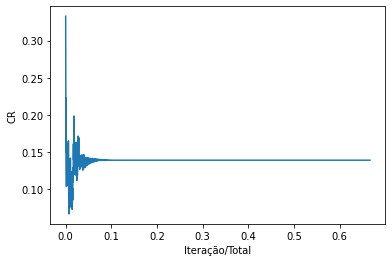

In [13]:
#!git clone https://github.com/ucfilho/Raianars_paper_one_revisited/AddFunctions 
!git clone https://github.com/ucfilho/Raianars_Routines #clonar do Github
%cd Raianars_Routines
############################### Função
import FunctionsNew
#'''  
############################### Função
dim=30 # 
fchoice='Ackley'
Fun=FunctionsNew.Ackley
MAX=np.repeat(32,dim)
MIN=np.repeat(-32,dim)
 #fx=
#'''
#####################################
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))

##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim
fobj=Fun

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
NPAR1=NPAR
# NPAR2=NPAR-NPAR1;print('Npar2=',NPAR2);print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
  


start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)
    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        

    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):
    
      
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)

      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]

    print('k=',iii,'time=',(time.time()-start_time)/60)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)

pd.set_option('display.max_columns', 30)  
print(df)

plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

In [14]:
df.columns

Index(['DIVERSIDADE (DI)', 'DI RELATIVO', 'FRAC Its', 'VELOC FOBJ', 'VELOC X',
       'NP', 'Fo', 'CRo', 'fmin', 'fmax', 'AD_fmin', 'AD_fmax', 'DELTA FOBJ',
       'DELTA VX', 'r_fitness', 'F', 'CR'],
      dtype='object')

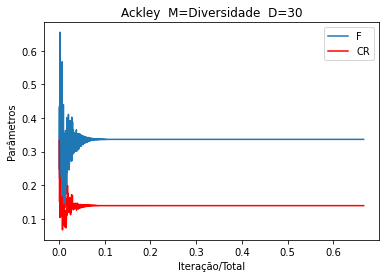

In [15]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'Ackley_Diversidade_D=30')

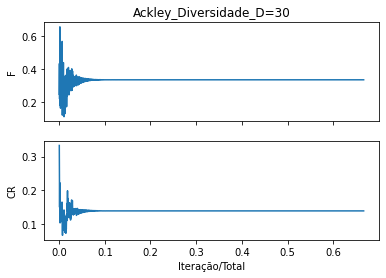

In [16]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [17]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

DE_POP_VAR_F_CR TOTAL= 300000 Iterações= 2000 Dim= 30 Min/Max= -32 / 32 _ Ackley
_ANN_Div3x4_Fo-0.5_CRo-0.5_D-30_Interv-2000 

MÉDIA:  7.549516567451064e-15
MIN __: 7.549516567451064e-15
MAX__:  7.549516567451064e-15
STD __: 0.0
Tempo Médio= 159.911 segundos ---
1 Rodadas

BEST:  [ 1.64912244e-15  5.14907306e-16 -2.09442393e-16 -3.79448069e-15
  3.67200234e-16 -5.09994388e-15 -1.82906924e-15  1.69799764e-15
  5.31276345e-16 -2.87299279e-16  9.91111963e-17  1.17403907e-15
 -3.21188044e-15  1.97763714e-16 -9.13567726e-16  1.46843291e-15
 -4.39470622e-15 -2.11411857e-15  2.62189263e-15  4.31337962e-16
  3.71891854e-17 -1.34553166e-15  2.21868671e-15  1.37218751e-15
  2.74765599e-15 -3.60137693e-15  8.51686325e-17  4.65806492e-15
 -3.07233365e-15 -2.31295792e-15  7.54951657e-15]


In [18]:
df.columns

Index(['DIVERSIDADE (DI)', 'DI RELATIVO', 'FRAC Its', 'VELOC FOBJ', 'VELOC X',
       'NP', 'Fo', 'CRo', 'fmin', 'fmax', 'AD_fmin', 'AD_fmax', 'DELTA FOBJ',
       'DELTA VX', 'r_fitness', 'F', 'CR'],
      dtype='object')

In [19]:
df = df[['FRAC Its','DI RELATIVO','fmin','fmax', 'F', 'CR']]
Arq = fchoice+'_Pure_Frannk.xlsx'
df.to_excel(Arq)
from google.colab import files
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>